In [2]:
import numpy as np
import matplotlib.pyplot as plt

# libraries for making a legend from scratch,
# I can't figure out how to get around doing this for 3D and contour plots
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# black box for making the graphs pannable :D
%pip install ipympl            

## Visualizing Newton's method applied to systems of 2 equations with 2 unknowns

The purpose of this problem is to get you to visualize Newton's method for systems when this is still feasible. For 3D plots in this section, you can use `Python` or [Desmos](https://www.desmos.com). Use whichever allows you to make figures that _you_ understand.

### Question 1 (Calculating Gradients): 
Consider the system of equations
\begin{align*}
f_1(x_1,x_2) &= x_1^2 + x_2^2 - 4 \\
f_2(x_1,x_2) & = x_1^2 + x_1x_2 + x_2^2 - 4
\end{align*}
Find the gradient for the functions $f_1$ and $f_2$

### Solution

$\nabla f_1 = [2x_1,\: 2x_2]$

$\nabla f_2 = [2x_1+x_2,\: x_1+2x_2]$

### Question 2 (Finding Tangent Planes):
Consider a general point, $(x_1,x_2) = (a,b)\in\mathbb{R}^2$. Find a formula for the plane tangent to each surface $z=f_1(x_1,x_2)$ and $z=f_2(x_1,x_2)$ in terms of $a$ and $b$.

### Solution

The tangent plane of a surface $f(x)$ at a point $\xi$ is given by $T = \nabla f \vert_{\xi} \cdot (x-\xi) + f(\xi)$.

Plugging in our functions from the system we get: 

\begin{align*}
T_1 &= 2a(x_1-a) + 2b(x_2-b) + (a^2+b^2-4) \\
T_2 &= (2a+b)(x_1-a) + (a+2b)(x_2-b) + (a^2+ab+b^2-4)
\end{align*}

### Question 3 (Building Newton's Method):
Construct function `newton_sys` that estimates the root of a system of nonlinear equations. In your routine, you are NOT allowed to use matrix inversion (of any kind!) and you must keep the python/numpy built-in function usage to a minimum. You are allowed to require a user to provide a number of iterations.

### Solution
We will utilize the linear system solver from my previous assignment.

In [3]:
def Reduce_Row(A, row_index):
    
    for i in range(row_index+1,np.shape(A)[0]):                 # iterate over the rows of A below the current row
        c = np.divide( A[i,row_index], A[row_index,row_index] ) # define a coefficient for Gaussian Elimnation
        A[i,:] = A[i,:] - c*A[row_index,:]                      # use Gaussian Elimination to assign row values
        
    return

def Row_Swap(A, row_index):
   
    n = np.shape(A)[1]                                       # define the row length of A
    temp = np.zeros(n)                                       # intialize a dummy row
    current_column = np.array(A[row_index:,row_index])       # define the current column
    max_row = A[row_index+np.argmax(abs(current_column)), :] # define the row with the maximum entry in the current column
    current_row = A[row_index,:]                             # define the current row
    temp[:] = current_row[:]                                 # assign the current row to temp
    current_row[:] = max_row[:]                              # assign the max row to the current row
    max_row[:] = temp[:]                                     # assign temp (current row) to the max row
    
    return

def Back_Sub(U,b):
    
    x = np.zeros((np.shape(U)[0],1))                    # initialize vector
    for row in range(np.shape(U)[0]-1,-1,-1):           # update x_row from the last row to the first row
        x[row] = b[row]                                 # start with x_row = b_row
        for column in range(row+1, np.shape(U)[1]):     # iterate over entries in row after x_row
            x[row] = x[row] - U[row,column] * x[column] # subtract each entry other than x_row
        x[row] /= U[row,row]                            # divide by coefficient of x_row
        
    return x    

def Solve_System_Gauss(A,b):
    
    aug = np.hstack( (A,b) )                          # augment A with b
    for column in range(np.shape(A)[1]):              # iterate of the rows of A
        Row_Swap(aug,column)                          # partial pivot
        Reduce_Row(aug,column)                        # Gaussian Elimination
    aug_mat, aug_b = np.hsplit(aug, [np.shape(A)[1]]) # extract the matrix part and the constant vector part from the augmented matrix
    sol = Back_Sub(aug_mat,aug_b)                     # back-substitue the matrix and vector after row reduction
    
    return sol

In [13]:
# z = f(x`) + grad(f)^T(x`) * (x-x`)
# ->  x = x` - Df(x')^-1 * f(x`)
# so Df(x`)y = -f(x`), y = x - x` and x = y + x`

def Newton_Sys(funcs, grad_funcs, xi, iters):
    
    for iterate in range(iters):   # iterate a given number of times
        
        f_xi = [[-funcs[i](xi)] for i in range(np.shape(funcs)[0])]                                                         # define -f(xi) in Df^T(xi)y = -f(xi)
        D_funcs = [ [grad_funcs[k][i](xi) for i in range(np.shape(grad_funcs)[1])] for k in range(np.shape(grad_funcs)[0])] # define Df^T(xi) in Df^T(xi)y = -f(xi)
        y = Solve_System_Gauss(D_funcs, f_xi).reshape([np.shape(xi)[0],])                                                   # solve Df^T(xi)y = -f(xi)
        xi = y + xi                                                                                                          # solve y = x - xi
        print(f'Approximation #{iterate+1}: {xi}')                                                                          # return current solution approximation
    
    return

### Question 4 (Visualizing Newton's Method):
Beginning with the initial guess $\mathbf{x}^{(0)} = (3,4)$. Obtain the next three Newton iterate approximations, $\{\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \mathbf{x}^{(3)}\}$, to a root of the system.

### Solution

In [14]:
def f_1(x):                                   #
    return (x[0]**2)+(x[1]**2)-4              #
def f_2(x):                                   # define function array for f(xi)
    return (x[0]**2)+(x[0]*x[1])+(x[1]**2)-4  #
funcs = np.array([f_1, f_2])                  #

def f_1_1(x):                                          #
    return 2*x[0]                                      #
def f_1_2(x):                                          #
    return 2*x[1]                                      #
def f_2_1(x):                                          #  define grad funcs for Df^T(xi)
    return 2*x[0]+x[1]                                 #
def f_2_2(x):                                          #
    return x[0]+2*x[1]                                 #
grad_funcs = np.array([[f_1_1, f_1_2],[f_2_1, f_2_2]]) #

point = np.array([3,4])  # define intial guess


Newton_Sys(funcs=funcs, grad_funcs=grad_funcs, xi=point, iters=3)

Approximation #1: [0.8 3. ]
Approximation #2: [0.20861244 2.21770335]
Approximation #3: [0.01871617 2.01873674]


### Question 5 (Visualizing Newton's Method):
For each of the iterates, $\mathbf{x}^{(0)},\dots, \mathbf{x}^{(1)}$, produce the following three graphs, all plotted separately for each iterate:
* 3D plot of the surface $z = f_1(x_1,x_2)$ with the plane tangent to $\mathbf{x}^{(k)}$.
* 3D plot of the surface $z = f_2(x_1,x_2)$ with the plane tangent to $\mathbf{x}^{(k)}$.
* 2D plot of the implicit functions $f_1 = 0$ and $f_2 = 0$. Include the lines where each tangent plane intersects $z=0$ (this can also be an implicit function, but will trace out a line). Include a scatter point of the current iterate $\mathbf{x}^{(k)}$

Comment on what you observe in the graphs.

### Solution

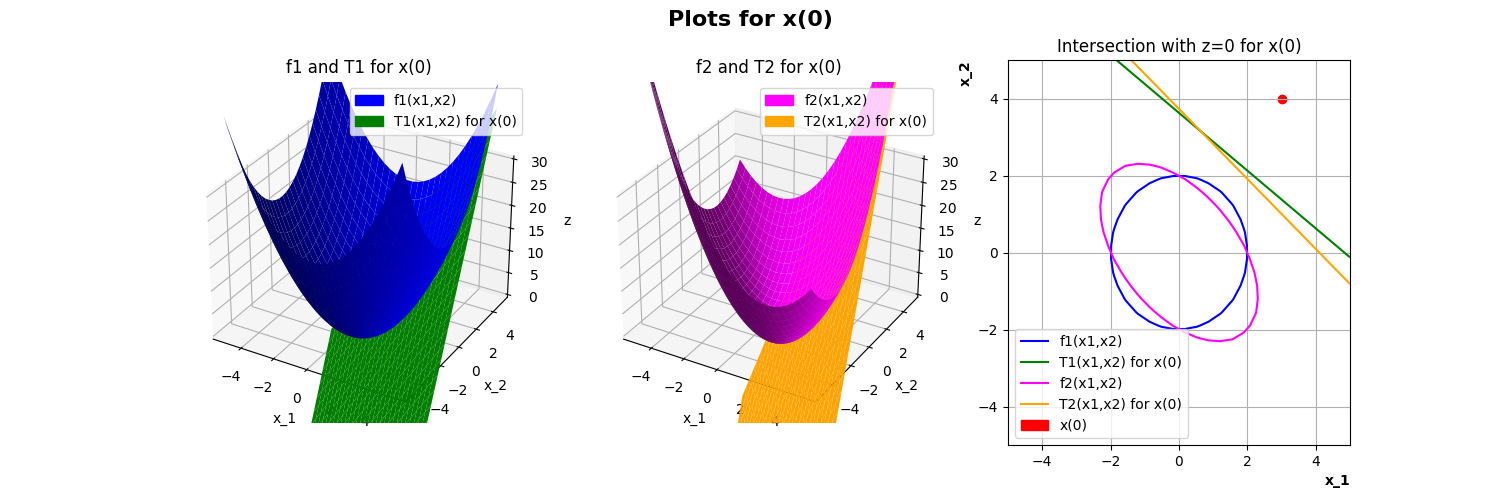

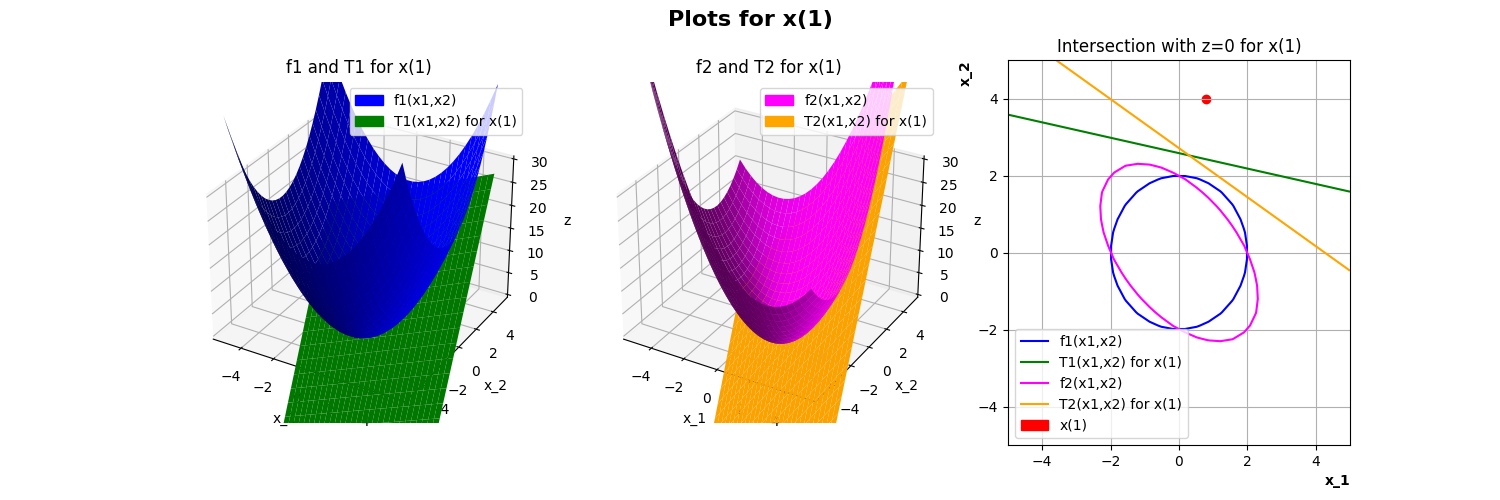

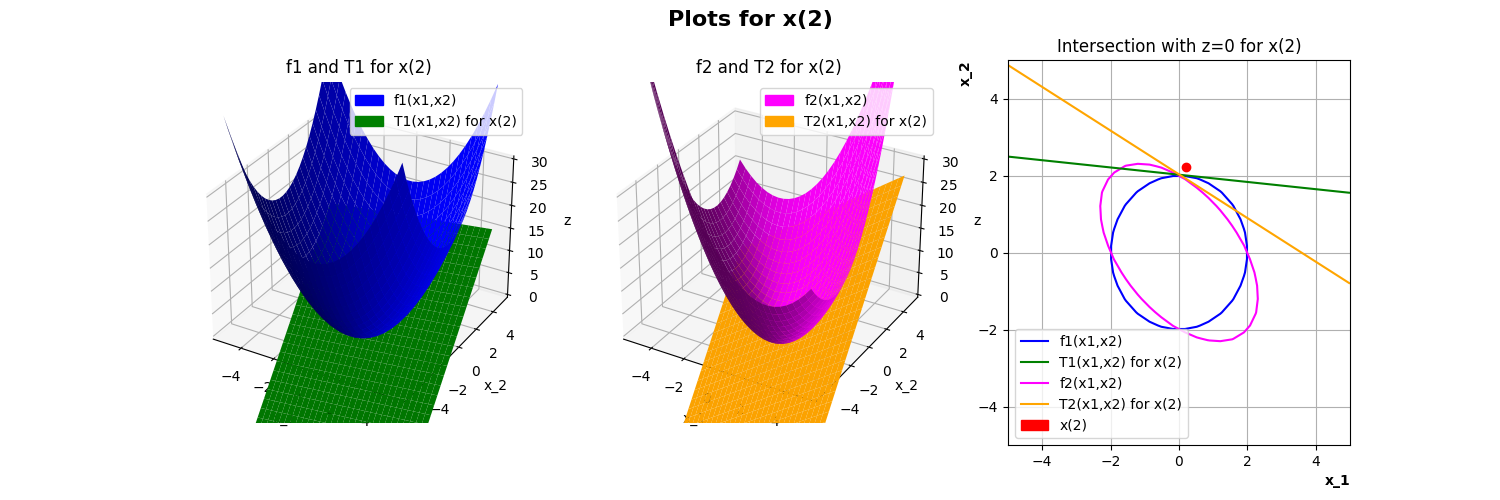

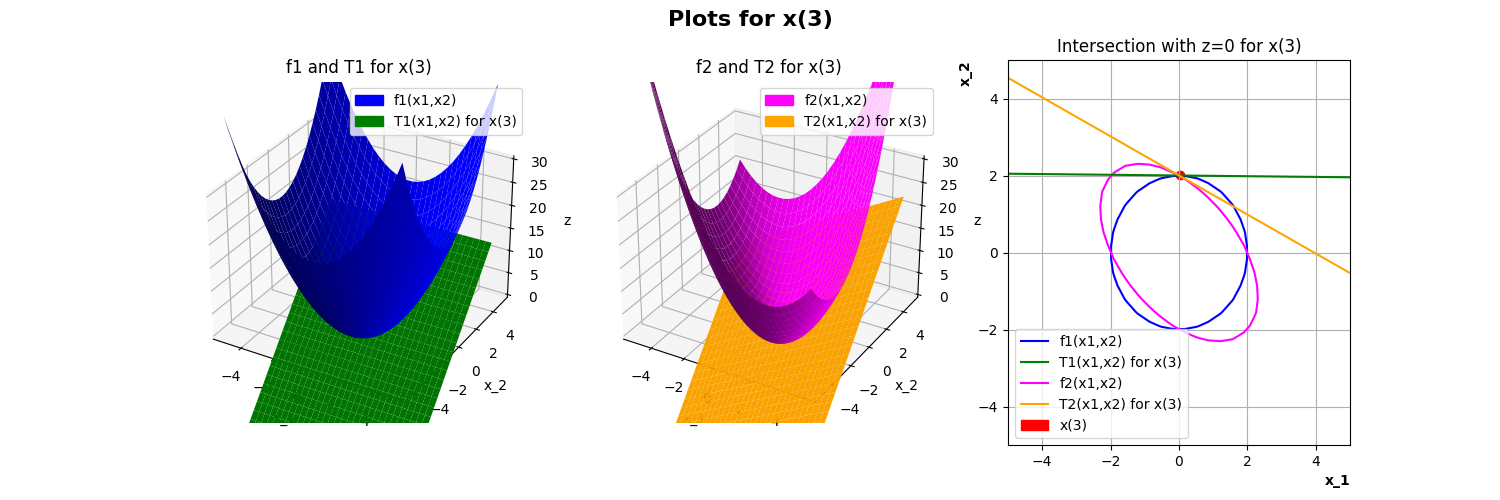

In [5]:
%matplotlib widget

x = np.linspace(-5, 5, 30) #
y = np.linspace(-5, 5, 30) # define the domain
x, y = np.meshgrid(x,y)    # 

z1 = np.array(x**2+y**2-4)     # define f1(x1,x2)
z2 = np.array(x**2+x*y+y**2-4) # define f2(x1,x2)


def tan_plane_1(a,b):                                 #
        z = np.array(2*a*(x-a)+2*b*(y-b)+a**2+b**2-4) # define tangent plane to f1 at (x1,x2) = (a,b)
        return z                                      #

def tan_plane_2(a,b):                                         #
    z = np.array((2*a+b)*(x-a)+(a+2*b)*(y-b)+a**2+a*b+b**2-4) # define tangent plane to f2 at (x1,x2) = (a,b)
    return z                                                  #





def Make_Plot(a,b,index, iterate):                          # define function that creates row of subplots for each iterate
    row,col,ind = index                                     # unpack the subplot indexing tuple
    
    fig = plt.figure(figsize=(15,5))                                  # initialize figure
    fig.suptitle(f'Plots for {iterate}', fontsize=16, weight='bold' ) # title full figure
    
    ax1 = fig.add_subplot(row,col,ind, projection='3d')     # add subplot into row*col 'plot matrix figure' in the 'ind'-th position, starting at 1 in the top left and going across the rows
    ax1.axes.set_zlim3d(bottom=0, top=30 )                  # limit z-axis to [0,30]
    ax1.plot_surface(x,y,z1, color='blue')                  # plot f1(x1,x2)
    ax1.plot_surface(x, y, tan_plane_1(a,b), color='green') # plot T1(x1,x2)

    f1_leg = mpatches.Patch(color='blue', label='f1(x1,x2)')                  #
    T1_leg = mpatches.Patch(color='green', label=f'T1(x1,x2) for {iterate}')  # create legend from scratch
    plt.legend(handles=[f1_leg, T1_leg])                                      #
    
    ax1.set_xlabel('x_1')                                   #
    ax1.set_ylabel('x_2')                                   # label axes and make title
    ax1.set_zlabel('z')                                     #
    ax1.title.set_text(f'f1 and T1 for {iterate}')          #

    
    ax2 = fig.add_subplot(row,col,ind+1, projection='3d')      # add subplot to the position after 'ind' in the figure
    ax2.axes.set_zlim3d(bottom=0, top=30 )                     # limit z-axis to [0,30]
    ax2.plot_surface(x,y,z2, label="f2(x,y)", color='magenta') # plot f2(x1,x2)
    ax2.plot_surface(x, y, tan_plane_2(a,b), color='orange')   # plot T1(x1,x2)

    f2_leg = mpatches.Patch(color='magenta', label='f2(x1,x2)')               #
    T2_leg = mpatches.Patch(color='orange', label=f'T2(x1,x2) for {iterate}') # create legend
    plt.legend(handles=[f2_leg, T2_leg])                                      #
    
    ax2.set_xlabel('x_1')                                   #
    ax2.set_ylabel('x_2')                                   # label axes and make title
    ax2.set_zlabel('z')                                     #
    ax2.title.set_text(f'f2 and T2 for {iterate}')          #

    
    ax3 = fig.add_subplot(row,col,ind+2)                    # add subplot in the position after 'ind' in the figure
    plt.contour(x,y,z1,[0], colors='blue')                  # plot f1(x1,x2) = 0
    plt.contour(x,y,z2,[0], colors='magenta')               # plot f2(x1,x2) = 0
    plt.contour(x,y,tan_plane_1(a,b), [0], colors='green')  # plot T1(x1,x2) = 0
    plt.contour(x,y,tan_plane_2(a,b), [0], colors='orange') # plot T2(x1,x2) = 0
    xk = plt.scatter(a,b, label=f'{iterate}', color='red')  # plot x(k)
    plt.xlabel('x_1', weight='bold', loc='right')           # label x-axis
    plt.ylabel('x_2', weight='bold', loc='top')             # label y-axis

    f1_leg = mlines.Line2D([],[], color='blue', label='f1(x1,x2)')                  # 
    T1_leg = mlines.Line2D([],[], color='green', label=f'T1(x1,x2) for {iterate}')  #
    f2_leg = mlines.Line2D([],[], color='magenta', label='f2(x1,x2)')               #   
    T2_leg = mlines.Line2D([],[], color='orange', label=f'T2(x1,x2) for {iterate}') # make legend
    xk_leg = mpatches.Patch(color='red', label=f'{iterate}')                        #
    handles=[f1_leg, T1_leg, f2_leg, T2_leg, xk_leg]                                #
    plt.legend(handles=handles, loc='lower left')                                   #
    
    plt.grid(True)                                           # show grid in 2D contour plot
    plt.title(f'Intersection with z=0 for {iterate}')        # make title
    plt.show()



Make_Plot(3,4, (1,3,1), 'x(0)' )                   #
Make_Plot(0.8,4, (1,3,1), 'x(1)')                  # make plots for each of x(0), x(1), x(2), and x(3)
Make_Plot(0.20861244,2.21770335, (1,3,1), 'x(2)')  #
Make_Plot(0.01871617,2.01873674, (1,3,1), 'x(3)')  #




### Comments

As we iterate through Newton's method, the point of tangency for the linear approximations gets closer and closer to a root of each function. This is very clear in the intersection subplot. Based on the intersection subplot it seems important that the gradient of each function is in a different direction from each other gradient, otherwise the projection lines would be parallel at z=0 and there may not be a unique solution in higher dimensions.

### Question 6 (Of course, things break):
Explain why we cannot begin with the initial guess $\mathbf{x}^{(0)} = (3,3)$. Can you think of a way to circumvent this type of error when applying Newton's method?

### Answer

For $x=(3,3)$, $\nabla f_1 = [6,6]$ and $\nabla f_2 = [9,9]$. So $ Df(3,3)^T = \begin{bmatrix} 6 & 6 \\ 9 & 9 \end{bmatrix}$. This is bad because our matrix is non-invertible, so applying Newton's method doesn't give a unique solution for the next approximation. A simple work-around could be just trying a different initial guess, but it feels like there should be a more elegant way to handle this error.

# An analysis of Newton's Method
In thise question, we will explore the order of convergence of the higher dimensional version of Newton's method. This means log-log plots.

This also means we need a way to quantify errors when the solutions are vectors, rather than numbers.

Consider a known solution $\mathbf{x}^{\text{exact}}\in\mathbb{R}^n$ to a system of equations. Let $\mathbf{x}^{\text{app}}\in\mathbb{R}^n$ be an approximate solution. We need to give meaning to the difference between these quantities,
\begin{equation}
\left\lvert \mathbf{x}^{\text{exact}} - \mathbf{x}^{\text{app}}\right\rvert.
\end{equation}
But absolute value doesn't quite make sense here. But we want to generalize what absolute value _actually_ quantifies---distance from zero!

So, we generalize absolute value to vectors as their distance from zero---this is the distance formula:
\begin{equation}
\left\lvert \mathbf{x}^{\text{exact}} - \mathbf{x}^{\text{app}}\right\rvert = \sqrt{ \left(x^{\text{exact}}_1 - x^{\text{app}}_1\right)^2 + \left(x^{\text{exact}}_2 - x^{\text{app}}_2\right)^2 + \dots + \left(x^{\text{exact}}_n - x^{\text{app}}_n\right)^2}
\end{equation}
This is called the "2-norm" of a vector, which you can calculate with numpy using `np.linalg.norm` (it's default norm is the 2-norm). You are free to use this built-in function. 

### Question 1: (Modify Newton's Method)
Modify your Newton method to terminate after the 2-norm between consecutive Newton Iterates is within a user-supplied tolerance.

### Solution

In [16]:
def Newton_Sys(funcs, grad_funcs, xi, tol, sol):

    check = True   # initialize while check
    x = xi         # initialize x
    iterate = 1    # initialize iterate
    
    while check:   # iterate while check is true
        
        errors.append(np.linalg.norm(sol-x)); # keep track of errors for each iterate
        
        f_xi = [[-funcs[i](x)] for i in range(np.shape(funcs)[0])]                                                         # define -f(xi) in Df^T(xi)y = -f(xi)
        D_funcs = [ [grad_funcs[k][i](x) for i in range(np.shape(grad_funcs)[1])] for k in range(np.shape(grad_funcs)[0])] # define Df^T(xi) in Df^T(xi)y = -f(xi)
        y = Solve_System_Gauss(D_funcs, f_xi).reshape([np.shape(x)[0],])                                                   # solve Df^T(xi)y = -f(xi)

        x_check = y + x                                                     # solve y = x - xi
        check = np.linalg.norm(x_check-x) > tol                             # check if 2-norm between iterates is within tolerance
        
        x = x_check                                                         # update x        
        print(f'Approximation #{iterate}: {x}')                             # return current solution approximation
        iterate+=1                                                          # update iterate counter
    
    return

### Question 2: (Solving a system of 3 equations with 3 unknowns)
Consider the system of equations
\begin{align*}
f_1(x_1,x_2,x_3) &= x_1^2 + x_2^2 + x_3^2 - 3\\
f_2(x_1,x_2,x_3) & = 2x_1^2 + x_2^2 - 4x_3+1 \\
f_3(x_1,x_2,x_3) & = 3x_1^2 - 4x_2 + x_3^2
\end{align*}
With exact solution $\mathbf{x}^{\text{exact}} = (1,1,1)$.

Estimate the root of this system with an initial guess of $\mathbf{x}^{(0)} = (1,0,0)$ until consecutive iterates are within $10^{-10}$ of each other. How many iterates were performed?

### Solution
There are 60 iterates performed.

In [17]:
def f1(x):
    return x[0]**2 +x[1]**2 +x[2]**2 -3
def f2(x):
    return 2*x[0]**2 +x[1]**2 -4*x[2] +1
def f3(x):
    return 3*x[0]**2 -4*x[1] +x[2]**2
funcs = np.array([f1, f2, f3])

def f1_1(x):
    return 2*x[0]
def f1_2(x):
    return 2*x[1]
def f1_3(x):
    return 2*x[2]
def f2_1(x):
    return 4*x[0]
def f2_2(x):
    return 2*x[1]
def f2_3(x):
    return -4
def f3_1(x):
    return 6*x[0]
def f3_2(x):
    return -4
def f3_3(x):
    return 2*x[2]

grad_funcs = np.array([[f1_1, f1_2, f1_3],
                       [f2_1, f2_2, f2_3],
                       [f3_1, f3_2, f3_3]])

point = np.array([5,5,5])
sol = np.array([1,1,1])

errors = []
Newton_Sys(funcs, grad_funcs, point, 10**(-10), sol)

Approximation #1: [2.94814815 2.44444444 2.13333333]
Approximation #2: [1.74482905 1.36892383 1.22752774]
Approximation #3: [1.17372558 1.03547868 1.01599389]
Approximation #4: [1.01306751 1.00037033 1.00012443]
Approximation #5: [1.0000843  1.00000004 1.00000001]
Approximation #6: [1. 1. 1.]
Approximation #7: [1. 1. 1.]
Approximation #8: [1. 1. 1.]


### Question 3: (Log-log plot)
Create a log-log plot of the errors. On the horizontal axis, plot the log of the errors from iterates $0$ to $N-1$ (assuming $N$ iterates beyond the initial guess). On the vertical axis, plot the log of the error from iterates $1$ to $N$ (see Lecture02 notes for details) 

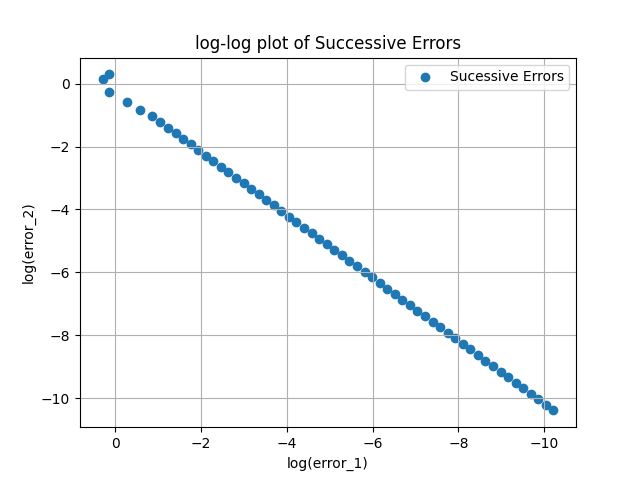

In [8]:
fig, ax = plt.subplots()
ax.scatter(np.log10(errors[0:-1]),np.log10(errors[1:]), label='Sucessive Errors')
ax.invert_xaxis()
plt.xlabel('log(error_1)')
plt.ylabel('log(error_2)')
plt.title('log-log plot of Successive Errors')
plt.legend()
plt.grid()
plt.show()

### Question 4: (Interpret rate of convergence)
Estimate the slope between consecutive points on the line from the previous line. What are these slope demonstrating?

### Answer

The slope between consecutive points is about 1. The slope demonstrates the order of convergence of the sequence, so it seems that Newton's method for higher dimensions converges at least linearly.

# Newton's Method for linear systems

Prove that Newton's method converges to the exact solution after one step, regardless of the initial condition, when solving the system of linear equations,
\begin{equation}
A\mathbf{x} = \mathbf{b}
\end{equation}

### Solution

Let's just go through Newton's method for this linear system.

We define $f(\mathbf{x}) = A\textbf{x} - \textbf{b}$ and $f_i(\mathbf{x}) = A_i\textbf{x} - \textbf{b}_i$ where $A_i$ and $\textbf{b}_i$ are the ith row of $A$ and $\mathbf{b}$ respectively.

Since $f_i$ is a linear function up to a constant,  $\nabla^T f_i = A_i$ and $D\mathbf{f}(\xi) = A$ where $\nabla^T f_i$ is the transpose of the gradient of $f_i$.

So solving $ z = \mathbf{f}(\xi) + D\mathbf{f}(\xi) * (\mathbf{x}-\xi) = 0 $, we get $x = \xi - D\mathbf{f}(\xi)^{-1}*\mathbf{f}(\xi) $

But $\quad \xi - D\mathbf{f}(\xi)^{-1}*\mathbf{f}(\xi) \quad = \quad \xi - A^{-1}*(A\xi-\mathbf{b}) \quad = \quad \xi - \xi + A^{-1}\mathbf{b} \quad = \quad A^{-1}\mathbf{b}, \quad$ and $x = A^{-1}\mathbf{b}$ solves $A\mathbf{x}=\mathbf{b}$ by definition.

Hence, Newton's method converges exactly after one iteration for linear systems.